In [124]:
import pandas as pd
df=pd.read_csv("2d corners n=40.csv")#.iloc[439].stimulus
df=df[df.task=="testing_categorize_corners"]
df=df[~df.wid.isin(['w887015b'])]#,'w28122f0','w2f812aa','w4623097','w4725cde','we581056','wc6c18a2','wce48bea'])]
# print(df)

In [120]:
gdf=df.groupby(['wid','response'])['response'].describe()
gdf[gdf['count']>30]

count  mean  std  min  25%  50%  75%  max
wid      response                                           
w0f2031b 2          33.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w11c7516 2          36.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w1269e02 2          32.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
         6          37.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w1a68907 2          36.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w28122f0 2          41.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w2a0aed8 2          35.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w2f812aa 2          47.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w3003351 6          36.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w3ea16b0 2          35.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w4623097 6          48.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w4725cde 2          50.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w506a48a 2          39.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w511e661 2          38.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w5bbceae 2          35.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
w6a6337c 0          33.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
w7710d46 0          34.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
w8090c67 6          39.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
w8898d8b 6          34.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
wa3250cf 2          31.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
wc413bbb 2          34.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
         6          39.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
wc6c18a2 2          40.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
wce48bea 6          40.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0
wd40947a 2          34.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
wdb3c709 2          33.0   2.0  0.0  2.0  2.0  2.0  2.0  2.0
we581056 6          49.0   6.0  0.0  6.0  6.0  6.0  6.0  6.0

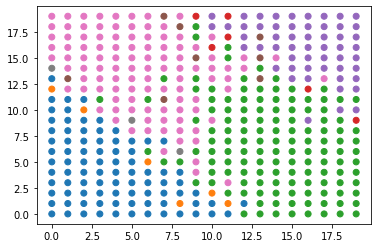

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def idx2coords(idxs):
    # print (idxs)
    x=idxs%20
    y=idxs//20
    return x,y
cmap = plt.get_cmap('tab10')
# create a dictionary to store unique coordinates and their responses
coord_dict = {}
x,y=idx2coords(np.array(df.target_dino.values))
for i in range(len(x)):
    coord = (x[i], y[i])
    if coord not in coord_dict:
        coord_dict[coord] = []
    coord_dict[coord]=df[df.target_dino==coord[1]*20+coord[0]].response.values

# find the most common response for each unique coordinate
coords = []
most_common = []
for coord in coord_dict:
    coords.append(coord)
    most_common.append(Counter(coord_dict[coord]).most_common(1)[0][0])
# print(most_common)
plt.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], c=most_common, cmap=cmap,vmin=-0.5, vmax=9.5)
# plt.show()
plt.savefig('2djoint.png')


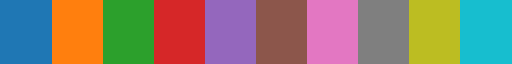

In [7]:
cmap

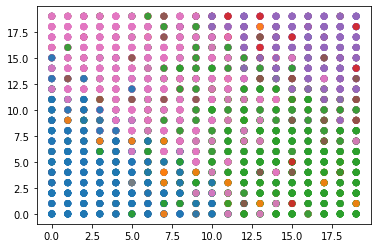

In [126]:
plt.scatter(x,y,c=df.response,cmap=cmap, alpha=.9, vmin=-0.5, vmax=9.5)
# plt.savefig('2djoint.png')

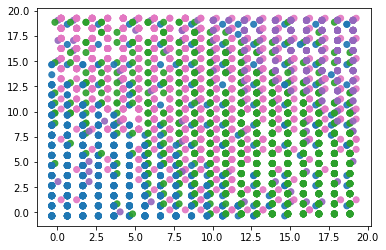

In [27]:
df1=df[~df.response.isin([1,3,5,7])]
x1,y1=idx2coords(np.array(df1.target_dino.values))
plt.scatter(x1+(df1.response-3.5)*.1,y1+(df1.response-3.5)*.1,c=df1.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

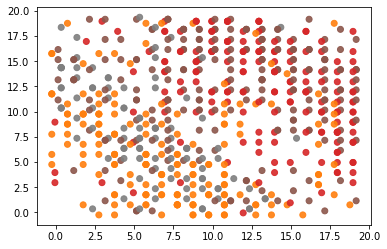

In [29]:
df2=df[df.response.isin([1,3,5,7])]
x2,y2=idx2coords(np.array(df2.target_dino.values))
plt.scatter(x2+(df2.response-3.5)*.1,y2+(df2.response-3.5)*.1,c=df2.response,cmap=cmap, alpha=0.9,vmin=-0.5,vmax=9.5)

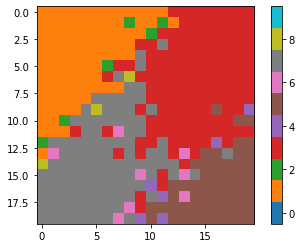

In [129]:
# create 2D array of most common responses
n_rows = int(max(y)) + 1
n_cols = int(max(x)) + 1
response_array = np.zeros((n_rows, n_cols))
for i in range(len(coords)):
    row = int(coords[i][1])
    col = int(coords[i][0])
    response_array[row, col] = most_common[i]+1

# define color map
cmap = plt.get_cmap('tab10')

# plot response array as a solid matrix
plt.imshow(response_array, cmap=cmap, interpolation='nearest', vmin=-0.5, vmax=9.5)

# add color bar legend
cbar = plt.colorbar()

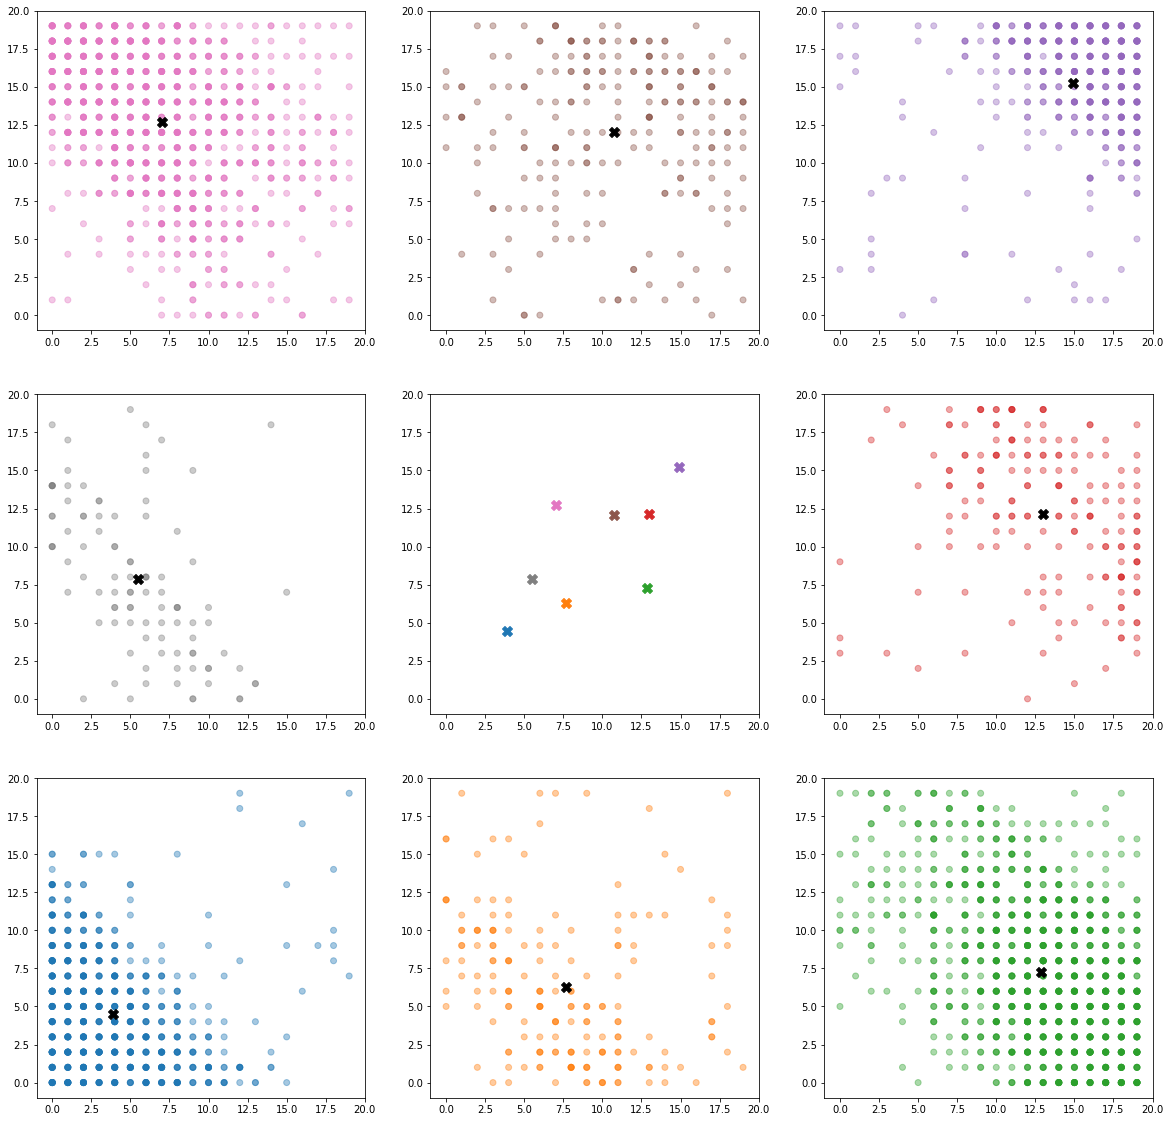

In [134]:
order=[7,8,9,6,3,2,1,4]
plt.figure(figsize=(20,20))
for i in sorted(df.response.unique()):
    dft=df[df.response.isin([i])]
    xt,yt=idx2coords(np.array(dft.target_dino.values))
    plt.subplot(3,3,order[i])
    plt.scatter(xt,yt,c=dft.response,cmap=cmap, alpha=0.4, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.scatter(np.mean(xt),np.mean(yt),c='black',cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    plt.subplot(3,3,5)
    plt.scatter(np.mean(xt),np.mean(yt),c=np.mean(dft.response),cmap=cmap, alpha=1, marker='X',s=100, vmin=-0.5, vmax=9.5, label=f'Species {i}')
    plt.ylim((-1,20))
    plt.xlim((-1,20))
    # plt.show()
plt.subplot(3,3,5)
# plt.colorbar()
plt.savefig('2d.png')